### Predicitng the 2016 EU referendum voting pattern 

In this project, I will develop classification models to determine which features best predict whether someone voted leave or remain as well as identifying the best predictive model by proper evaluation metrics.

The dataset for this project was obtained from data.gov.uk. The voting outcome was collected in 2016 which consists of the 327 entries that represent all the areas in England. For the purpose of this project, I had to collect population data that contains socio-economic, demographic, and education variables from nomis.co.uk. 

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
%matplotlib inline

In [2]:
# importing the dataset 
data = pd.read_csv("Brexit.csv")

In [3]:
# Exploring the data by the function .head()
# display the first 5 rows
data.head()

,Region_Code,Region,Area_Code11,Area_Code14,Area,Centroid_x,Centroid_y,Electorate,VerifiedBallotPapers,Pct_Turnout,...,Republic_of_Ireland,EU_countries,Non_EU_countries,Africa,Middle_East_and_Asia,North_Americaandthe_Caribbean,Central_America,South_America,Antarctica_and_Oceania,British_Overseas_Territories
0,E12000001,North East,E06000001,E06000001,Hartlepool,447878,530729,70341,46134,65.59,...,0.1,0.5,0.0,0.1,0.4,0.1,0.0,0.0,0.1,0
1,E12000001,North East,E06000002,E06000002,Middlesbrough,450413,516581,94612,61393,64.89,...,0.3,1.4,0.1,0.8,2.0,0.1,0.0,0.0,0.1,0
2,E12000001,North East,E06000003,E06000003,Redcar and Cleveland,463446,517816,103529,72741,70.26,...,0.2,0.4,0.1,0.1,0.2,0.1,0.0,0.0,0.1,0
3,E12000001,North East,E06000004,E06000004,Stockton-on-Tees,443277,518710,141486,100460,71.00,...,0.2,0.6,0.1,0.3,0.9,0.1,0.0,0.0,0.1,0
4,E12000001,North East,E06000005,E06000005,Darlington,429039,517141,77662,55195,71.07,...,0.2,1.5,0.1,0.2,0.7,0.2,0.0,0.0,0.1,0


### Data Exploration

In this section, we will make an investigation about the Brexit data to draw any observations. Through exploring data, I can better understand the patterns that could help justify my results.

In [4]:
# Calculate descriptive statistics
data.describe()

,Centroid_x,Centroid_y,Electorate,VerifiedBallotPapers,Pct_Turnout,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,...,Republic_of_Ireland,EU_countries,Non_EU_countries,Africa,Middle_East_and_Asia,North_Americaandthe_Caribbean,Central_America,South_America,Antarctica_and_Oceania,British_Overseas_Territories
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.0
mean,460048.018405,265053.579755,119501.665644,87294.748466,74.383252,87224.714724,40637.036810,46587.677914,45.498589,54.501411,...,0.662883,3.135276,0.245092,0.768405,1.609509,0.608589,0.006442,0.101840,0.375460,0.0
std,87384.708258,125126.086762,77116.327197,52630.515033,4.916731,52577.020493,28185.565142,27923.777308,10.016305,10.016305,...,0.572232,3.068322,0.328105,0.968972,1.947970,1.080678,0.026974,0.216254,0.537297,0.0
min,90507.000000,12831.000000,1799.000000,1424.000000,59.250000,1424.000000,803.000000,621.000000,24.440000,21.380000,...,0.100000,0.400000,0.000000,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.0
25%,396102.500000,169976.500000,72929.750000,55264.250000,71.395000,55226.250000,23041.000000,29886.500000,38.862500,50.322500,...,0.300000,1.200000,0.100000,0.200000,0.400000,0.200000,0.000000,0.000000,0.100000,0.0
50%,459614.500000,243483.000000,97020.000000,73730.500000,75.130000,73684.000000,32516.500000,38061.500000,44.540000,55.460000,...,0.500000,2.100000,0.100000,0.400000,0.900000,0.300000,0.000000,0.000000,0.200000,0.0
75%,525969.500000,359062.250000,143785.500000,105337.000000,78.280000,105251.750000,48152.250000,54480.750000,49.677500,61.137500,...,0.775000,3.400000,0.200000,0.900000,2.000000,0.600000,0.000000,0.100000,0.400000,0.0
max,647697.000000,593759.000000,707293.000000,451336.000000,83.570000,450702.000000,223451.000000,227251.000000,78.620000,75.560000,...,3.400000,19.900000,2.400000,6.400000,14.600000,14.300000,0.200000,1.500000,4.400000,0.0


In [5]:
# check the shape of the dataframe
data.shape

(326, 61)

In [6]:
# check for missing values
data.isnull()

,Region_Code,Region,Area_Code11,Area_Code14,Area,Centroid_x,Centroid_y,Electorate,VerifiedBallotPapers,Pct_Turnout,...,Republic_of_Ireland,EU_countries,Non_EU_countries,Africa,Middle_East_and_Asia,North_Americaandthe_Caribbean,Central_America,South_America,Antarctica_and_Oceania,British_Overseas_Territories
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
322,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


From the above table, it is clear that data is cleaned as there is no missing value. Hence, we can proceed to model the data.

In [7]:
# inspect the columns of the dataset
data.columns

Index(['Region_Code', 'Region', 'Area_Code11', 'Area_Code14', 'Area',
       'Centroid_x', 'Centroid_y', 'Electorate', 'VerifiedBallotPapers',
       'Pct_Turnout', 'Valid_Votes', 'Remain', 'Leave', 'Pct_Remain',
       'Pct_Leave', 'Outcome', 'Diff', 'young_age', 'Middle_age', 'Old_age',
       'In_employment', 'EmployeePart_time', 'Employee:Full_time',
       'Self_employed', 'Unemployed', 'White', 'Mixed_multiple', 'Other_Mixed',
       'Asian_Asian_British', 'Black_African_Caribbean_BlackBritish',
       'Otherethnicgroup', 'No_qual', 'P_Level1', 'P_Level2', 'Apprenticeship',
       'P_Level3', 'P_Level4+', 'P_other', 'Very_good_health', 'Good_health',
       'Fair_health', 'Bad_health', 'Very_bad_health', 'Owned_outright',
       'Owned_mortgage', 'part_owned_and_part_rented', 'Social_rented',
       'Private_rented', 'Living_rent_free', 'No_passport', 'United_Kingdom',
       'Republic_of_Ireland', 'EU_countries', 'Non_EU_countries', 'Africa',
       'Middle_East_and_Asia', 'Nort

In [8]:
# drop the column that seems irrelevant
data.drop(["Area_Code11","Area_Code14","Centroid_x","Centroid_y"], axis = 1, inplace = True)

## One hot encoding 

In machine learning, data must be in numeric form to have an accurate result. Hence, the purpose of using one hot encoding is to convert text to numerical values. We will do that in the code below.

In [9]:
# creating dummy variables
dummy = pd.get_dummies(data["Outcome"])
join = pd.concat([data,dummy],axis =1)

In [10]:
data['outcome'] = data.Outcome.map({"Leave":1,"Remain":0})

In [11]:
data.drop("Outcome",axis =1)

,Region_Code,Region,Area,Electorate,VerifiedBallotPapers,Pct_Turnout,Valid_Votes,Remain,Leave,Pct_Remain,...,EU_countries,Non_EU_countries,Africa,Middle_East_and_Asia,North_Americaandthe_Caribbean,Central_America,South_America,Antarctica_and_Oceania,British_Overseas_Territories,outcome
0,E12000001,North East,Hartlepool,70341,46134,65.59,46100,14029,32071,30.43,...,0.5,0.0,0.1,0.4,0.1,0.0,0.0,0.1,0,1
1,E12000001,North East,Middlesbrough,94612,61393,64.89,61358,21181,40177,34.52,...,1.4,0.1,0.8,2.0,0.1,0.0,0.0,0.1,0,1
2,E12000001,North East,Redcar and Cleveland,103529,72741,70.26,72714,24586,48128,33.81,...,0.4,0.1,0.1,0.2,0.1,0.0,0.0,0.1,0,1
3,E12000001,North East,Stockton-on-Tees,141486,100460,71.00,100415,38433,61982,38.27,...,0.6,0.1,0.3,0.9,0.1,0.0,0.0,0.1,0,1
4,E12000001,North East,Darlington,77662,55195,71.07,55166,24172,30994,43.82,...,1.5,0.1,0.2,0.7,0.2,0.0,0.0,0.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,E12000009,South West,Mendip,85068,65509,77.01,65455,33427,32028,51.07,...,1.9,0.1,0.1,0.3,0.3,0.0,0.0,0.3,0,0
322,E12000009,South West,Sedgemoor,89714,68448,76.30,68414,26545,41869,38.80,...,0.6,0.0,0.1,0.3,0.1,0.0,0.0,0.1,0,1
323,E12000009,South West,South Somerset,126495,99535,78.69,99467,42527,56940,42.75,...,3.2,0.1,0.2,1.2,0.2,0.0,0.0,0.1,0,1
324,E12000009,South West,Taunton Deane,84164,65785,78.16,65733,30944,34789,47.08,...,1.0,0.0,0.1,0.3,0.2,0.0,0.0,0.1,0,1


In [47]:
# Selecting the target and the features
target = data['outcome']
features = data.drop(["Outcome","outcome","Area","Region","Region_Code"],axis = 1)

### Data Visualization

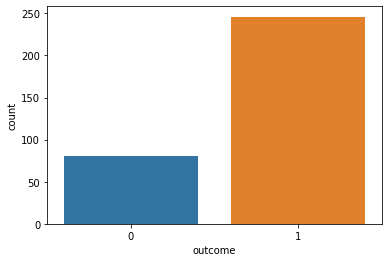

In [28]:
sns.countplot(x ="outcome",data=data)

From the voting outcome, it was clear that ther percentage of people that voted leave were more than those who supported to be in the EU. We further created a plot to show it corresponds to the result declared.

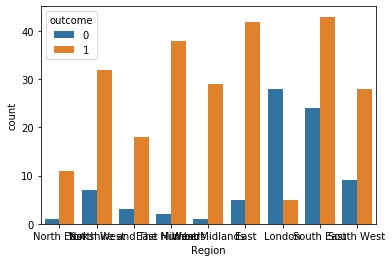

In [29]:
sns.countplot(x = "Region",hue ="outcome",data= data)

The plot above shows the count of the voting outcome by each region in England. It is clear that the number of people that voted for leave were more than people who leaned remained. East of England appears to have the highest number of people that opted to leave the EU.  

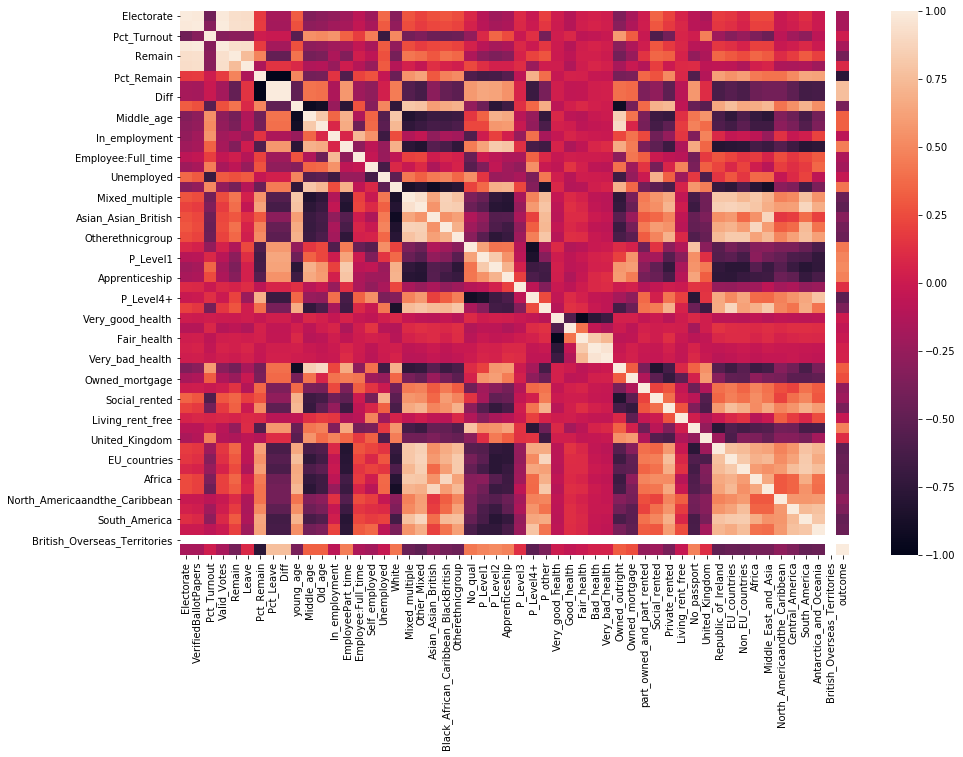

In [30]:
# correlation between target and the features 
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())

The correlation plot just established a relationship between the variables

### Data Modelling 

This is  the section where we will develop models neccessary to make predictions. Since this is a classification,We are going to use various various techniques such as logistic regression, decision tree, random forest, and support vector machine.

Before implementing the algorithms, we need to split the data into two set; training data and testing data.The following will be implemneted:

* Use the train_test_split module to split the data 
* Split the data into 80% and 20% for training and testing sets.
* Assign the split to the data

In [65]:
# splitting the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(features, target, test_size =0.2, random_state=8)

In [66]:
# Inspect the shapes of the split
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)

X_train (260, 53)
X_test (66, 53)
Y_train (260,)
Y_test (66,)


In [67]:
# Logistic regression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# predict the model on the test data
model_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(Y_test,model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        53

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [71]:
print(confusion_matrix(Y_test,model_pred))

[[13  0]
 [ 0 53]]


In [75]:
# Decision tree
tree = DecisionTreeClassifier(random_state = 8)
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8, splitter='best')

In [76]:
tree_pred = tree.predict(X_test)

In [77]:
accuracy_score(Y_test,tree_pred)

1.0

In [78]:
log = model.fit(features,target)

In [79]:
log.predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
y_pred = log.predict(features)
y_pred

In [87]:
accuracy_score(target,y_pred)

1.0

In [94]:
# Random forest
rf = RandomForestClassifier(n_estimators = 500,random_state = 10)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [95]:
rf_pred = rf.predict(X_test)

In [96]:
rf_score = accuracy_score(Y_test,rf_pred)
rf_score

1.0

In [97]:
print(confusion_matrix(Y_test,rf_pred))

[[13  0]
 [ 0 53]]


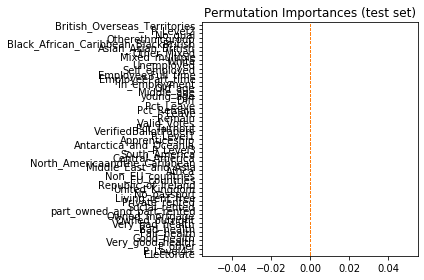

In [102]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_test, Y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()